In [ ]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [ ]:
read=pd.read_csv('FINAL_DATASET.csv')

In [ ]:
read.shape

(66913, 9)

In [ ]:
read['SRI'].replace('', np.nan, inplace=True)

In [ ]:
read.dropna(subset=['SRI'], inplace=True)

In [ ]:
read.shape

(66600, 9)

In [ ]:
read.drop(read.index[read['SRI'] == '#NAME?'], inplace = True)

In [ ]:
read.shape

(66490, 9)

In [ ]:
target = read['Degree_of_congestion']
df1 = read.copy()
df1 = df1.drop('Degree_of_congestion', axis =1)
df1.shape

(66490, 8)

In [ ]:
le = LabelEncoder()
target = le.fit_transform(target)
target

array([3, 2, 0, ..., 0, 3, 2])

In [ ]:
target2 = df1['arrival_time']

In [ ]:
le = LabelEncoder()
arrival_time = le.fit_transform(target2)
arrival_time

array([ 834,  181,  900, ..., 4968, 5098, 5124])

In [ ]:
df1['arrival_time_new'] = arrival_time

In [ ]:
target3 = df1['trip_id']

In [ ]:
le = LabelEncoder()
trip_id = le.fit_transform(target3)
trip_id

array([3726,  355,   23, ..., 5328, 5338, 5338])

In [ ]:
df1['trip_id_new'] = trip_id

In [ ]:
target4 = df1['speed']

In [ ]:
le = LabelEncoder()
Speed = le.fit_transform(target4)

In [ ]:
df1['speed_new'] = Speed

In [ ]:
df1

,stop_id_from,stop_id_to,trip_id,arrival_time,time,speed,Number_of_trips,SRI,arrival_time_new,trip_id_new,speed_new
0,36156,38709,NORMAL_333_Pune Station To Hinjawadi Maan Pha...,09:13:54,0.027222,14.479565,9.0,-0.40816322,834,3726,4309
1,36156,38709,NORMAL_115P_Pune Station to Hinjawadi Phase 3_...,09:03:01,0.032222,12.232736,9.0,1.2068965,181,355,2975
2,36156,38709,NORMAL_100_Ma Na Pa to Hinjawadi Maan Phase 3_...,09:15:00,0.058333,6.757130,9.0,5.142857,900,23,695
3,36156,38709,NORMAL_VJR5_Ma Na Pa To Mukai Chowk_Up-0905_0,09:05:00,0.033611,11.727251,9.0,1.570248,300,5284,2693
4,36156,38709,NORMAL_100_Ma Na Pa to Hinjawadi Maan Phase 3_...,09:00:00,0.058333,6.757130,9.0,5.142857,0,22,695
...,...,...,...,...,...,...,...,...,...,...,...
66908,1319,1104,NORMAL_VJR6_Bhosari To Hinjawadi Maan Phase 3_...,18:01:44,0.015278,24.892663,1.0,2.1818185,4842,5328,12869
66909,1104,1106,NORMAL_VJR6_Bhosari To Hinjawadi Maan Phase 3_...,18:02:53,0.013056,37.426898,1.0,2.9787233,4911,5328,23485
66910,1106,1108,NORMAL_VJR6_Bhosari To Hinjawadi Maan Phase 3_...,18:03:50,0.036111,12.837577,1.0,7.076923,4968,5328,3326
66911,39593,39385,NORMAL_VJR6_Hinjawadi Maan Phase 3 To Bhosari_...,18:06:00,0.003611,71.066206,1.0,-20.89835036,5098,5338,32222


In [ ]:
X=df1

In [ ]:
X=X.drop('trip_id', axis=1)
X=X.drop('arrival_time', axis=1)

In [ ]:
X=X.drop('Number_of_trips', axis=1)
X=X.drop('time', axis=1)
X=X.drop('speed', axis=1)


In [ ]:
X=X.drop('SRI',axis=1)

In [ ]:
y=target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size = 0.2, random_state = 42)

print("Training split input- ", X_train.shape)
print("Testing split input- ", X_test.shape)

Training split input-  (53192, 5)
Testing split input-  (13298, 5)


In [ ]:
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = dtree.predict(X_test)
accuracy_score(y_test,y_pred)*100

81.1024214167544

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

In [ ]:
# f1 score
precision = precision_score(y_pred, y_test,pos_label='positive',average='weighted')
recall = recall_score(y_pred, y_test,pos_label='positive',average='weighted')
score = f1_score(y_pred, y_test,pos_label='positive',average='weighted')

# print
print("Decision Tree Precision score: {:.2f}".format(precision))
print("Decision Tree Recall score: {:.2f}".format(recall))
print("Decision Tree F1 score: {:.2f}".format(score))

Decision Tree Precision score: 0.81
Decision Tree Recall score: 0.81
Decision Tree F1 score: 0.81


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,


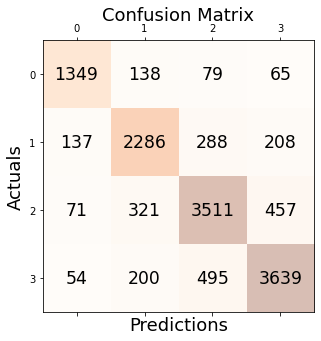

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()